# 用哑铃图进行对比分析

### 1. 初始设置

首先，导入所需的库，并设置中文字体等。

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
c = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
     '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
     '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 定义数据

In [2]:
# 数据源路径
filepath='./data/问卷调查结果2.xlsx'

# 读取 Excel文件
df = pd.read_excel(filepath)

# 定义画图用的数据
category_names = df.index
labels = df.columns
data = df.values

df['变化'] = df.iloc[:, 2] - df.iloc[:, 1]

### 3. 开始画图

用「**面向对象**」的方法画图。

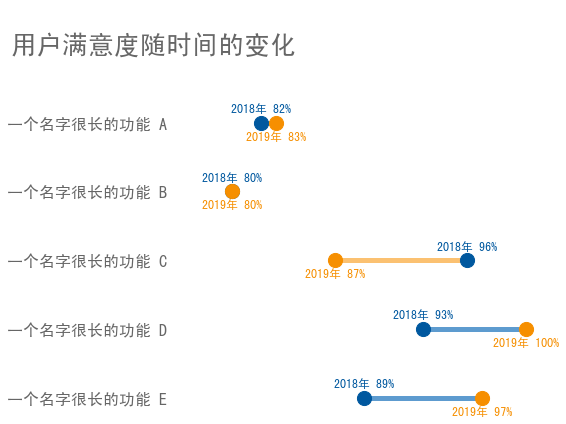

In [3]:
# 使用「面向对象」的方法画图，定义图片的大小
fig, ax = plt.subplots(figsize=(8, 6))

# 设置背景颜色
fig.set_facecolor('w')
ax.set_facecolor('w')

# 设置标题
ax.set_title('\n用户满意度随时间的变化\n\n', loc='left', size=26, color=c['深灰色'])

# 定义范围
rng = range(1, len(df.index)+1)
rng_pos = list(map(lambda x:x+1, df[df['变化']>=0].index))
rng_neg = list(map(lambda x:x+1, df[df['变化']<0].index))

# 绘制哑铃图中间的线条
ax.hlines(y=rng_pos, xmin=df[df['变化']>=0].iloc[:, 1], xmax=df[df['变化']>=0].iloc[:, 2], color=c['浅蓝色'], zorder=1, lw=5)
ax.hlines(y=rng_neg, xmin=df[df['变化']< 0].iloc[:, 1], xmax=df[df['变化']< 0].iloc[:, 2], color=c['浅橙色'], zorder=1, lw=5)

# 绘制哑铃图两头的圆点
ax.scatter(df.iloc[:, 1], rng, color=c['蓝色'], label=df.columns[1], s=200, zorder=2)
ax.scatter(df.iloc[:, 2], rng, color=c['橙色'], label=df.columns[2], s=200, zorder=2)

# 显示数据标签
for i, (txt1, txt2) in enumerate(zip(df.iloc[:, 1], df.iloc[:, 2])):
    ax.annotate(df.columns[1] + ' ' + '{:.0%}'.format(float(txt1)), (df.iloc[:, 1][i], df.index[i]+0.8), color=c['蓝色'], ha='center', va='center', fontsize=12)
    ax.annotate(df.columns[2] + ' ' + '{:.0%}'.format(float(txt2)), (df.iloc[:, 2][i], df.index[i]+1.2), color=c['橙色'], ha='center', va='center', fontsize=12)

# 设置 Y 轴标签
plt.yticks(rng, df.iloc[:, 0], ha='left', color=c['深灰色'], size=16)

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# 设置 X 轴的取值范围
ax.set_xlim(0.65, 1.01)

# 隐藏 X 轴
ax.xaxis.set_visible(False)

# 倒转 Y 轴，让第一个功能排在最上面
ax.invert_yaxis()

# 隐藏 Y 轴的刻度线
ax.tick_params(axis='y', which='major', length=0)

plt.show()